In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier # vecinos más cercanos para clasificación
from sklearn.metrics import accuracy_score # métrica de evaluación
from sklearn.metrics import classification_report

# Análisis Exploratorio

In [2]:
df_smokers = pd.read_csv('https://raw.githubusercontent.com/pokengineer/DataScience/main/datasets/smokers.csv')
df_smokers.head(5)

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,35,170,85,97.0,0.9,0.9,1,1,118,78,...,70,142,19.8,1,1.0,61,115,125,1,1
1,20,175,110,110.0,0.7,0.9,1,1,119,79,...,71,114,15.9,1,1.1,19,25,30,1,0
2,45,155,65,86.0,0.9,0.9,1,1,110,80,...,57,112,13.7,3,0.6,1090,1400,276,0,0
3,45,165,80,94.0,0.8,0.7,1,1,158,88,...,46,91,16.9,1,0.9,32,36,36,0,0
4,20,165,60,81.0,1.5,0.1,1,1,109,64,...,47,92,14.9,1,1.2,26,28,15,0,0


In [3]:
# verificamos los tipos de datos
df_smokers.dtypes

,0
age,int64
height(cm),int64
weight(kg),int64
waist(cm),float64
eyesight(left),float64
eyesight(right),float64
hearing(left),int64
hearing(right),int64
systolic,int64
relaxation,int64


In [4]:
print("Tamaño del dataframe : {}".format(df_smokers.shape))

Tamaño del dataframe : (38984, 23)


In [5]:
# Verificamos si hay valores nulos para imputar
df_smokers.isnull().sum()

,0
age,0
height(cm),0
weight(kg),0
waist(cm),0
eyesight(left),0
eyesight(right),0
hearing(left),0
hearing(right),0
systolic,0
relaxation,0


smoking
0    24666
1    14318
Name: count, dtype: int64


<Axes: xlabel='smoking', ylabel='count'>

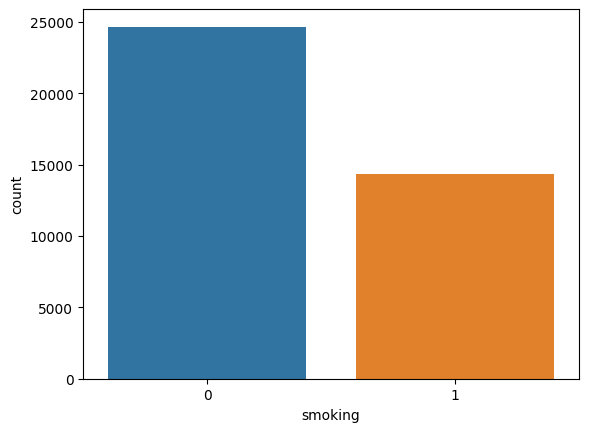

In [6]:
# Analisis de la distribución de la variable target "smoking"
print( df_smokers.smoking.value_counts() )
sns.countplot(x='smoking', data=df_smokers, hue='smoking', legend=False)

[]

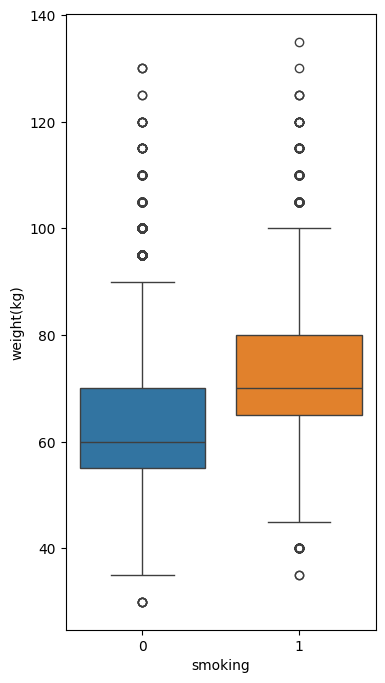

In [7]:
plt.figure(figsize=(4, 8))
s=sns.boxplot(x="smoking", y="weight(kg)", data=df_smokers, hue="smoking", legend=False)
s.plot()

# Correlación de Variables

<Axes: >

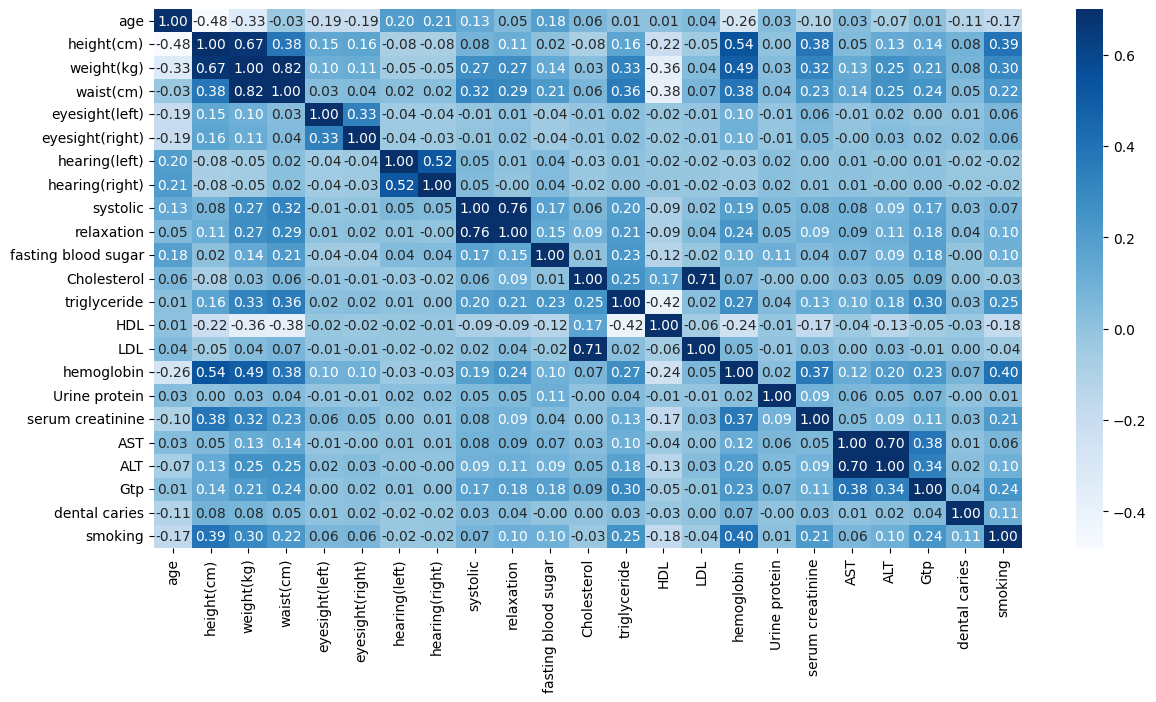

In [8]:
plt.figure(figsize=(14,7))
sns.heatmap(df_smokers.corr(), annot=True, vmax=.7, cmap ='Blues', fmt=".2f")

In [10]:
df_smokers_corr = df_smokers.corr()[["smoking"]]*100 # lo pasamos a porcentajes
df_smokers_corr = df_smokers_corr.drop("smoking", axis=0) # eliminamos la variable target
df_smokers_corr = df_smokers_corr.sort_values(["smoking"], ascending=False) # ordenamos en forma descendente
df_smokers_corr = abs(df_smokers_corr) # nos interesa el valor absouluto
df_smokers_corr

,smoking
hemoglobin,40.120561
height(cm),39.431445
weight(kg),29.934668
triglyceride,25.105661
Gtp,24.027443
waist(cm),22.335903
serum creatinine,21.247301
dental caries,10.760060
relaxation,10.366297
fasting blood sugar,9.990846


# Seleccionamos y Escalamos las variables que vamos a utilizar

Soligo: Acá Facundo con algun criterio de selección de variables que desconozco se quedó con 10 variables, ese código lo quité, usen su intuición o alguna herramienta de las vistas dentro del tiempo disponible.

In [11]:
df = df_smokers

In [12]:
# Hacemos el Split 70-30 para train-test
y_smokers = df["smoking"]
X_train, X_test, y_train, y_test = train_test_split(df.drop(["smoking"],axis = 1), y_smokers, test_size=0.3, stratify = y_smokers, random_state=42)

In [13]:
# usamos StandardScaler para escalar las variables
scaler_X = StandardScaler(with_mean=True, with_std=True)
scaler_X.fit(X_train) # entrenamos los valores quitandole la variable clase

StandardScaler()

Soligo: Atención a este código ¿Porque mejor no escalar todo antes de dividir en entrenamiento y test?

In [14]:
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

In [15]:
test_scores = []

# Creamos y entrenamos el algoritmo con 20 valores de K
for k in range(3,40,2):
  knn = KNeighborsClassifier(k)
  knn.fit(X_train,y_train) # Creamos y entrenamos el clasificador knn

  # Para cada valor de K, evaluamos la capacidad de clasificación con datos de prueba
  y_pred = knn.predict(X_test)
  test_scores.append(accuracy_score(y_test, y_pred)) # Agregamos los K resultados de evaluación

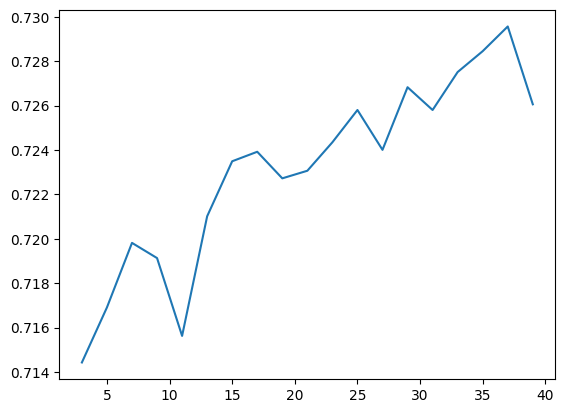

In [16]:
df_scores = pd.DataFrame([{"k":valor_k, "score":test_scores_k} for valor_k, test_scores_k in zip(range(3,40,2),test_scores)])
plt.plot(df_scores["k"], df_scores["score"])

In [17]:
df_scores

,k,score
0,3,0.714432
1,5,0.716912
2,7,0.719819
3,9,0.719135
4,11,0.715629
5,13,0.721016
6,15,0.723495
7,17,0.723923
8,19,0.722726
9,21,0.723068


In [18]:
# Entrenamos el algoritmo con el mejor K
knn = KNeighborsClassifier( 11 )
knn.fit(X_train,y_train) # Entrenamos el clasificador

KNeighborsClassifier(n_neighbors=11)

In [19]:
y_pred_knn = knn.predict(X_test)

#Exactitud del modelo
print('Exactitud (accuracy) del modelo: {:.2f} %'.format(accuracy_score(y_test, y_pred_knn)*100))
print("-"*100)

# Reporte del clasificador
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_knn))

Exactitud (accuracy) del modelo: 71.56 %
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.79      0.78      7400
           1       0.62      0.59      0.60      4296

    accuracy                           0.72     11696
   macro avg       0.69      0.69      0.69     11696
weighted avg       0.71      0.72      0.71     11696



# Ejercicio
Dado el análisis exploratorio concluimos que no hace falta imputar variables y que la variable target esta balanceada.
- Usando el mapa de calor de correlaciones, ¿que pares de columnas comparten más de un 0.7 de correlación?
- Entrenar un modelo con K menor a 11, comparar los resultados
- Entrenar un modelo con K mayor a 11, comparar los resultados
- Entrenar un modelo con 3 variables, seleccionar un K apropiado y comparar los resultados
- Seleccionar variables segun su intuición o usando herramientas vistas hasta ahora (Esta claro, no son muchas).
- "Feature Engineering", Crear una columna nueva no redundante, entrenar un modelo y comparar los resultados

## Resolucion

### Usando el mapa de calor de correlaciones, ¿que pares de columnas comparten más de un 0.7 de correlación?

In [21]:
import numpy as np

# Obtener la matriz de correlación
corr_matrix = df_smokers.corr()

# Seleccionar solo valores por encima de 0.7 (excluyendo la diagonal)
high_corr = corr_matrix.abs() > 0.7
np.fill_diagonal(high_corr.values, False)  # evitar correlación de una columna consigo misma

# Obtener los pares de columnas con correlación > 0.7
high_corr_pairs = [
    (col1, col2, corr_matrix.loc[col1, col2])
    for col1 in corr_matrix.columns
    for col2 in corr_matrix.columns
    if high_corr.loc[col1, col2] and col1 < col2
]

# Mostrar los pares
for col1, col2, corr in high_corr_pairs:
    print(f"{col1} - {col2}: {corr:.2f}")


waist(cm) - weight(kg): 0.82
relaxation - systolic: 0.76
Cholesterol - LDL: 0.71


### Entrenar un modelo con K menor a 11, comparar los resultados

In [22]:
# Entrenamos el algoritmo con K = 7
knn7 = KNeighborsClassifier( 7 )
knn7.fit(X_train,y_train) # Entrenamos el clasificador

KNeighborsClassifier(n_neighbors=7)

In [23]:
y_pred_knn = knn7.predict(X_test)

#Exactitud del modelo
print('Exactitud (accuracy) del modelo: {:.2f} %'.format(accuracy_score(y_test, y_pred_knn)*100))
print("-"*100)

# Reporte del clasificador
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_knn))

Exactitud (accuracy) del modelo: 71.98 %
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.79      0.78      7400
           1       0.62      0.60      0.61      4296

    accuracy                           0.72     11696
   macro avg       0.70      0.69      0.70     11696
weighted avg       0.72      0.72      0.72     11696



Vemos que tiene una diferencia de menos del 1% del accuracy. (71.98%) y subio el precision y el recall.

##Entrenar un modelo con K mayor a 11, comparar los resultados

In [24]:
# Entrenamos el algoritmo con K = 37
knn37 = KNeighborsClassifier( 37 )
knn37.fit(X_train,y_train) # Entrenamos el clasificador

KNeighborsClassifier(n_neighbors=37)

In [25]:
y_pred_knn = knn37.predict(X_test)

#Exactitud del modelo
print('Exactitud (accuracy) del modelo: {:.2f} %'.format(accuracy_score(y_test, y_pred_knn)*100))
print("-"*100)

# Reporte del clasificador
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_knn))

Exactitud (accuracy) del modelo: 72.96 %
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      7400
           1       0.64      0.61      0.62      4296

    accuracy                           0.73     11696
   macro avg       0.71      0.70      0.71     11696
weighted avg       0.73      0.73      0.73     11696



Vemos que tiene una diferencia de mas del 1% del accuracy. (72.96%) y subio el precision y el recall respecto del modelo con K=11.

##Entrenar un modelo con 3 variables, seleccionar un K apropiado y comparar los resultados

In [27]:
# Calcular las correlaciones con la variable 'target'
correlations = df_smokers.corr()['smoking'].drop('smoking')  # eliminamos la correlación de target consigo mismo

# Ordenar por valor absoluto de la correlación
top_3 = correlations.abs().sort_values(ascending=False).head(10)

# Mostrar las 3 variables con mayor correlación
for col in top_3.index:
    print(f"{col}: {correlations[col]:.2f}")


hemoglobin: 0.40
height(cm): 0.39
weight(kg): 0.30
triglyceride: 0.25
Gtp: 0.24
waist(cm): 0.22
serum creatinine: 0.21
HDL: -0.18
age: -0.17
dental caries: 0.11


Elegimos hemoglobin, height(cm), weight(kg) por estar en el top 3 de correlacion de variables

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# 1. Selección de features y target
x_smokers = df_smokers[['hemoglobin', 'height(cm)', 'weight(kg)']]
y_smokers = df_smokers['smoking']  # Asegurate de que sea una variable categórica o binaria

# 2. Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x_smokers, y_smokers, test_size=0.3, stratify = y_smokers, random_state=42)

# 3. Normalización de las features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




Accuracy: 0.6933994528043775
              precision    recall  f1-score   support

           0       0.77      0.74      0.75      7400
           1       0.58      0.61      0.59      4296

    accuracy                           0.69     11696
   macro avg       0.67      0.68      0.67     11696
weighted avg       0.70      0.69      0.70     11696



In [32]:
test_scores = []

# Creamos y entrenamos el algoritmo con valores impares de K entre 3 y 39
for k in range(3, 40, 2):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train_scaled, y_train)  # Entrenamiento con datos escalados

    # Evaluación también con datos escalados
    y_pred = knn.predict(X_test_scaled)
    test_scores.append(accuracy_score(y_test, y_pred))  # Guardamos la exactitud


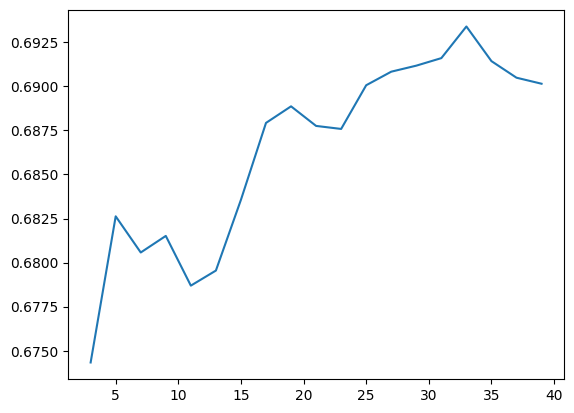

In [34]:
df_scores = pd.DataFrame([{"k":valor_k, "score":test_scores_k} for valor_k, test_scores_k in zip(range(3,40,2),test_scores)])
plt.plot(df_scores["k"], df_scores["score"])

In [36]:
# Entrenar modelo K = 33
knn = KNeighborsClassifier(n_neighbors=33)  # K = 33
knn.fit(X_train_scaled, y_train)

# Evaluar el modelo
y_pred = knn.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6933994528043775
              precision    recall  f1-score   support

           0       0.77      0.74      0.75      7400
           1       0.58      0.61      0.59      4296

    accuracy                           0.69     11696
   macro avg       0.67      0.68      0.67     11696
weighted avg       0.70      0.69      0.70     11696



Vemos que tiene una diferencia negativa de mas del 1% del accuracy. (69.33%) y bajo el precision y el recall respecto del modelo con K=11.

## Seleccionar variables segun su intuición o usando herramientas vistas hasta ahora

Elegiriamos hemoglobin, height(cm), weight(kg), triglyceride, Gtp: 0.24, waist(cm), serum creatinine, HDL, age porque son el top 9 del ranking de correlacion

## "Feature Engineering", Crear una columna nueva no redundante, entrenar un modelo y comparar los resultados

In [37]:
# Crear una nueva columna: índice de masa corporal (IMC)
# Fórmula: peso(kg) / (altura en metros)^2
df_smokers['BMI'] = df_smokers['weight(kg)'] / ((df_smokers['height(cm)'] / 100) ** 2)


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
features = [
    'hemoglobin',
    'height(cm)',
    'weight(kg)',
    'triglyceride',
    'Gtp',
    'waist(cm)',
    'serum creatinine',
    'HDL',
    'BMI'  # columna nueva
]
X = df_smokers[features]
y = df_smokers['smoking']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)
accuracy_with_BMI = accuracy_score(y_test, y_pred)
print("Accuracy con BMI:", accuracy_with_BMI)


Accuracy con BMI: 0.7157881236372964


Si quitamos BMI

In [39]:
X2 = df_smokers[features[:-1]]  # todas menos 'BMI'
X2_train, X2_test, _, _ = train_test_split(X2, y, test_size=0.2, random_state=42)

X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)

knn.fit(X2_train_scaled, y_train)
y_pred2 = knn.predict(X2_test_scaled)
accuracy_without_BMI = accuracy_score(y_test, y_pred2)
print("Accuracy sin BMI:", accuracy_without_BMI)


Accuracy sin BMI: 0.718737976144671


Anexo</BR>
Sparsity-aware metrics</BR>
Score=Accuracy×(1−Proporción de variables usadas)</BR>
Mejor accuracy = 0.74</BR>
Variables usadas = 4</BR>
Total de variables = 21</BR>
Proporcion = 4/21=0.19 1-.19 = 0.81</BR>
ScoreFinal = 0.74*0.81 = 0.59

